### 다변량 선형 확률 구하기 with VAR
- https://ysyblog.tistory.com/299?category=1186605
- 

#### 1. 데이터 로딩 및 시각화

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

raw = sm.datasets.macrodata.load_pandas().data
dates_info = raw[['year', 'quarter']].astype(int).astype(str)
raw.index = pd.DatetimeIndex(sm.tsa.datetools.dates_from_str(dates_info['year'] + 'Q'+ dates_info['quarter']))
raw_use = raw.iloc[:, 2:5]

- 실제 GDP = 실제 CON(소비) + 실제 INV(투자)

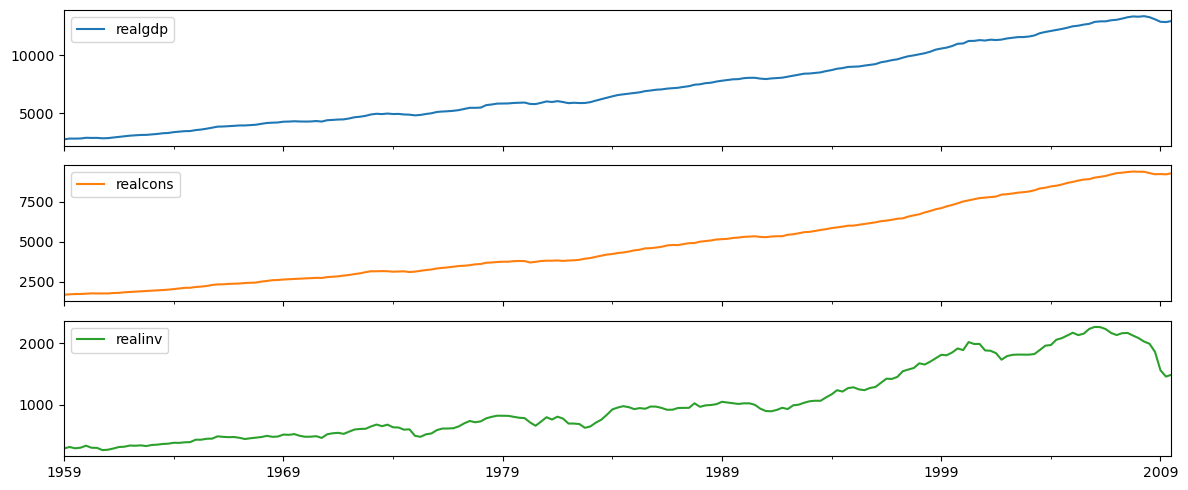

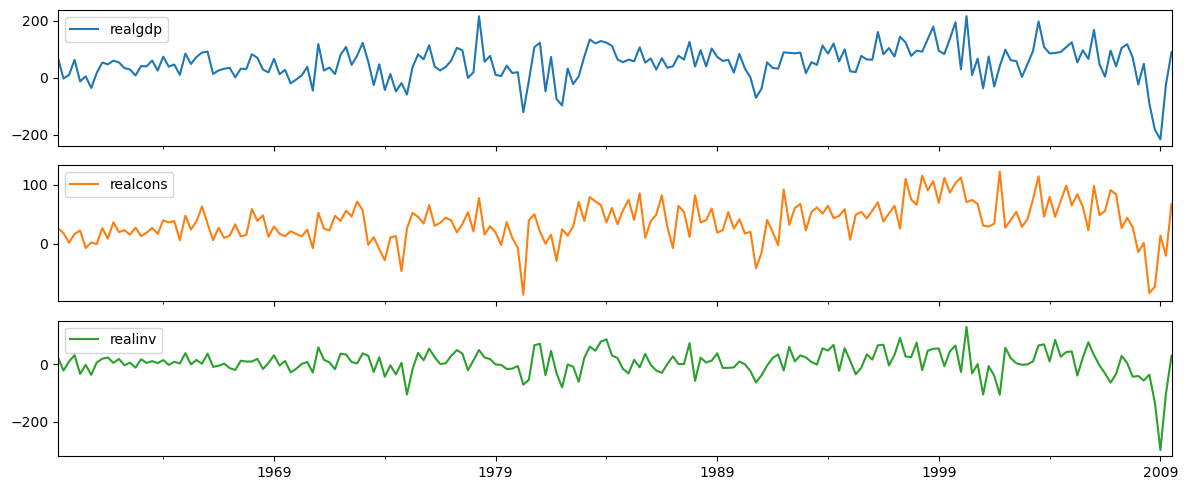

In [5]:
raw_use.plot(subplots = True, figsize = (12, 5))
plt.tight_layout()
plt.show()

raw_use.diff(1).dropna().plot(subplots = True, figsize = (12, 5))
plt.tight_layout()
plt.show()

#### 2. VAR 모형

- realgdp : realgdp, realcon, realinv 의 시차 L1 모두와 realcon의 시차 L2에 영향
- realcon : realgdp, realcon, realinv 에 시차 L1, L2 모두 영향
- realinv : realgdp, realcon, realinv 에 시차 L1 만 영향
- realcon, realgdp, realinv 순으로 가장 다른 변수에 영향 많이 받음

In [6]:
raw_use_return = raw_use.diff(1).dropna()
fit = sm.tsa.VAR(raw_use_return).fit(maxlags = 2)
display(fit.summary())

/home/ubuntu/anaconda3/envs/info/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Sep, 2022
Time:                     09:40:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.5675
Nobs:                     200.000    HQIC:                   20.3614
Log likelihood:          -2852.49    FPE:                6.05346e+08
AIC:                      20.2212    Det(Omega_mle):     5.45987e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              10.308143         6.425207            1.604           0.109
L1.realgdp         -0.394370         0.148481           -2.656           0.008
L1.realcons         1.185980         0.186610            6.355    

#### 3. 모형 예측 및 시각화

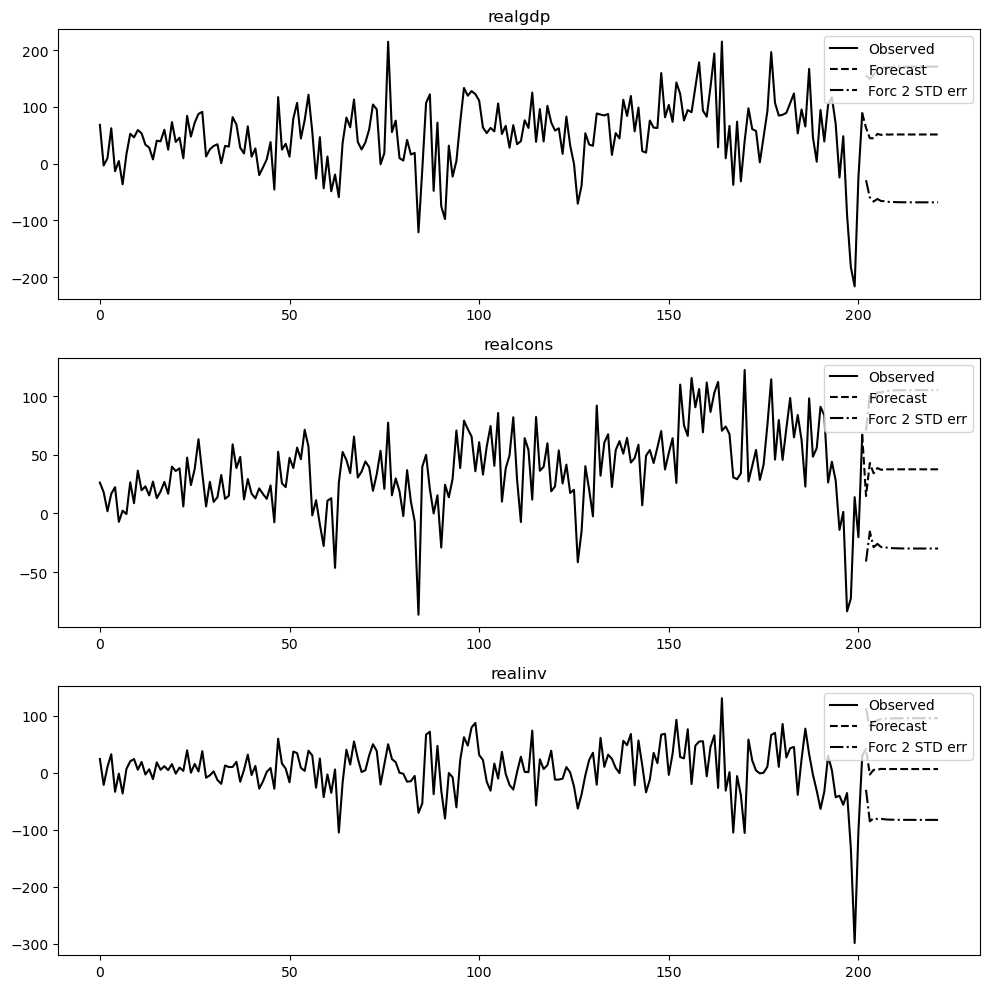

In [13]:
forecast_num = 20

# 점추정
# pre_var = fit.forecast(fit.model.endog[-1:], steps = forecast_num)

# 구간추정
# pre_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps = forecast_num)

fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

- 임펄스 반응 함수
    - realgdp -> realgdp : 단기적으로 음수로 바뀌지만 0으로 수렴
    - realgdp -> realcons : gdp가 증가, 소비가 감소하다가 늘어남
    - realinv -> realcons : 실제 투자가 증가하면서 실제 소비 증가하다가 0으로 수렴
    - realcon -> realgdp : 소비가 증가하면 실제 gdp가 상당히 증가하다가 0으로 수렴
    - realinv -> realgdp : 투자가 증가하면 실제 gdp가 소폭 증가하다가 0으로 수렴

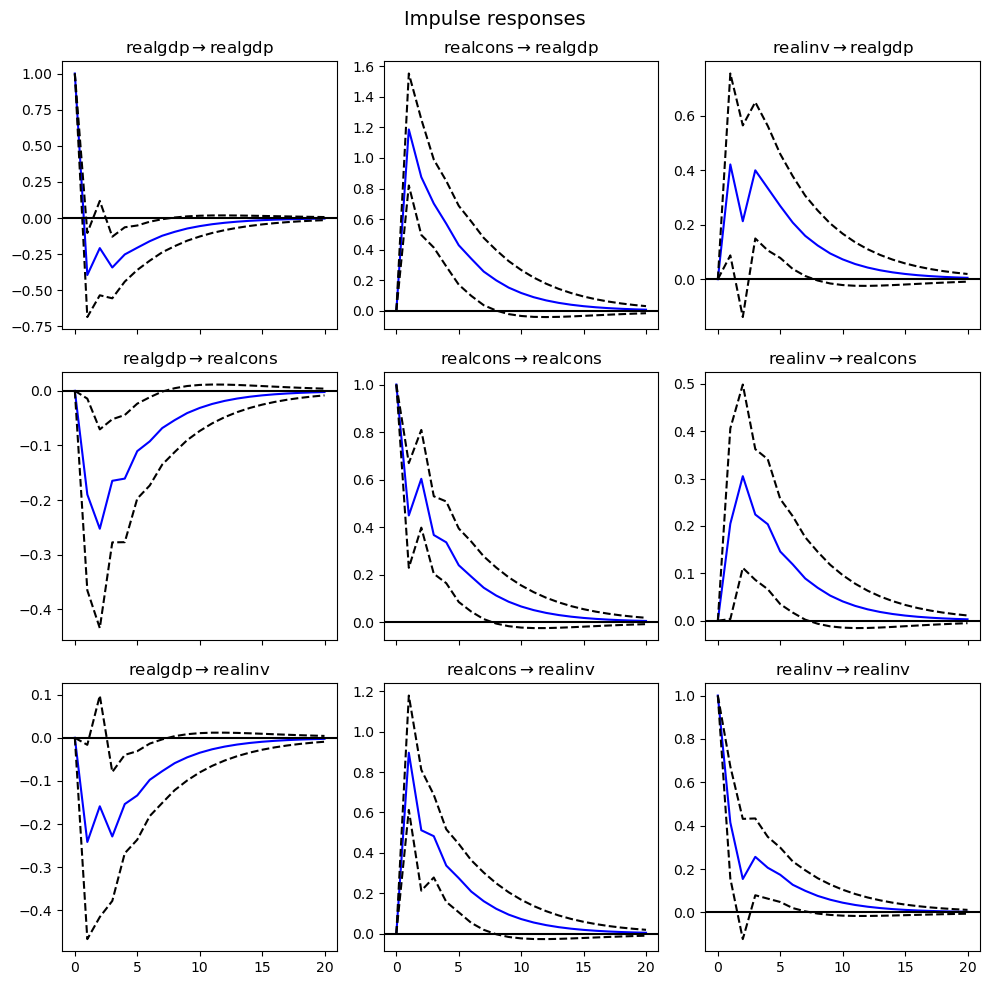

In [12]:
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

#### 4. 잔차 진단

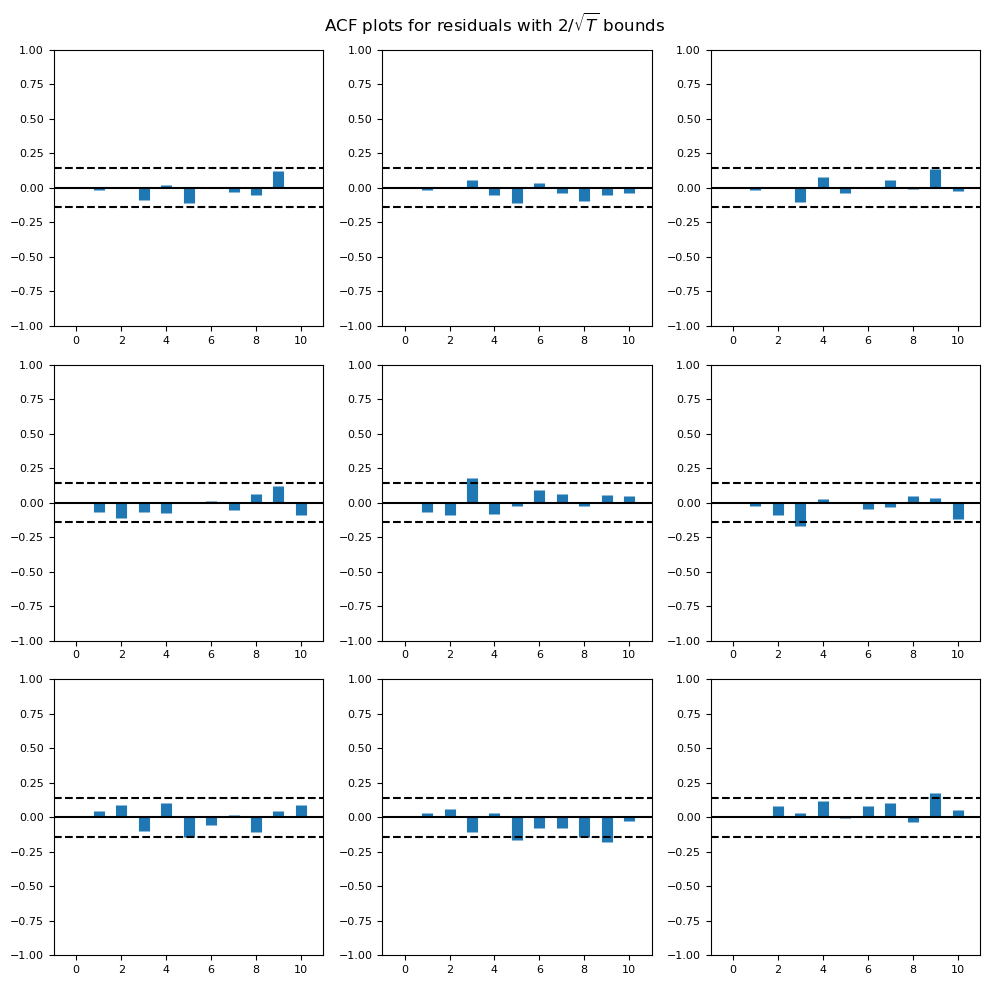

In [14]:
fit.plot_acorr()
plt.tight_layout()
plt.show()